In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# read data files

df = pd.read_csv("data/USvideos.csv")
category = pd.read_json("data/US_category_id.json")

# json file is a dictionary where it only differs in the interal "items" corresponding to the categories
# select only this column that is what we want to extract
category = category["items"] 

# visualize first 5 video data
df.head(5)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
category[0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [4]:
# we want to take the category from json file and match it with the category_id of our whole data df
# the category is inside "snippet" and then "title"
# create a mapping from "id" to "title"

id_to_title = {entry['id']: entry['snippet']['title'] for entry in category}

# as category_id is numeric and in json file is string, we convert it
df["category_id"] = df['category_id'].astype(str)

# Map the "category_id" to the corresponding "title"
df['category'] = df['category_id'].map(id_to_title)

In [5]:
# group by 'category' and take relevant features "views" and "likes"
category_stats = df.groupby('category')[['views', 'likes']].sum().sort_values(by='views', ascending=False)
category_stats.head()

,views,likes
category,,
Music,40132892190,1416838584
Entertainment,20604388195,530516491
Film & Animation,7284156721,165997476
Comedy,5117426208,216346746
People & Blogs,4917191726,186615999


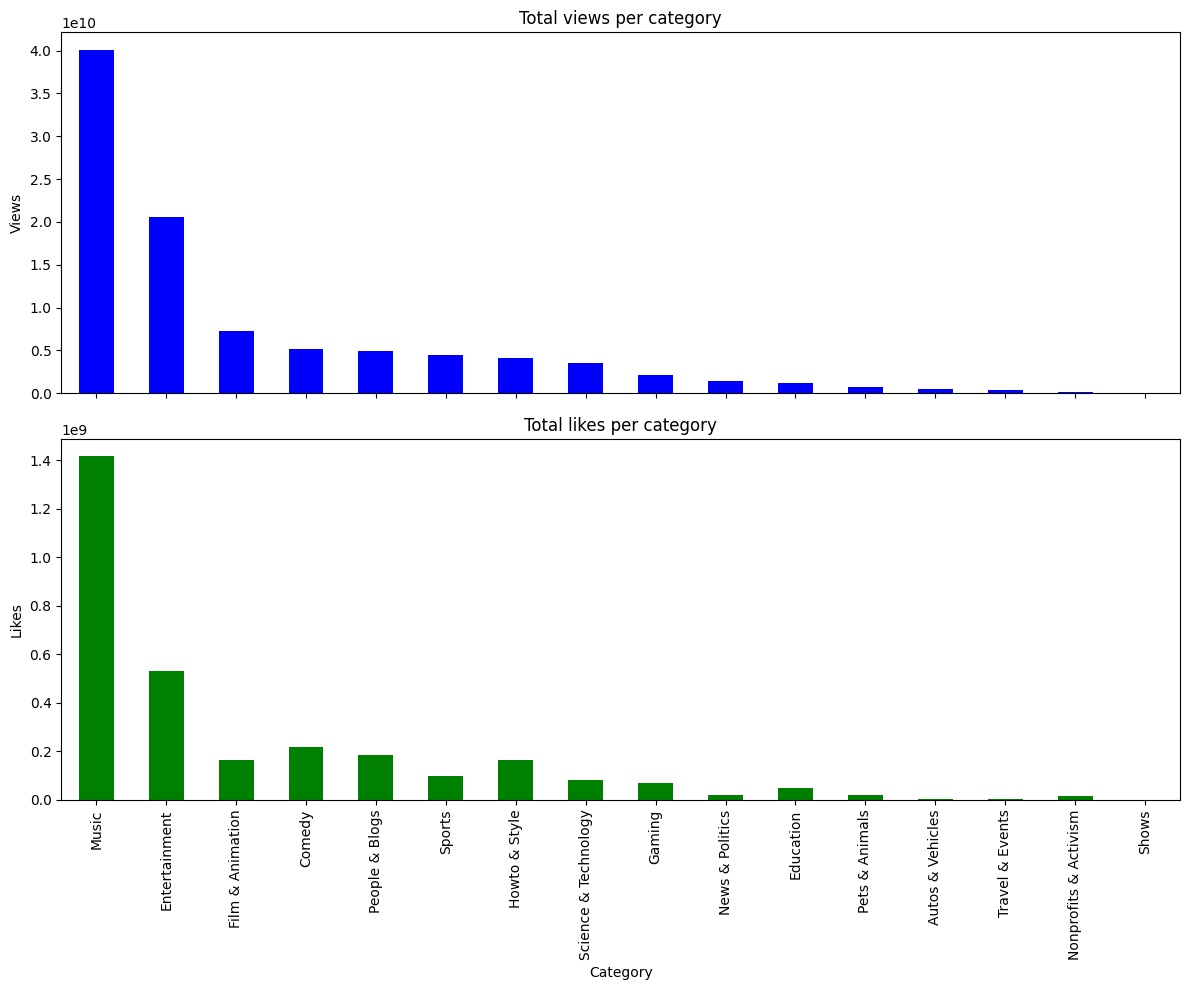

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de vistas
category_stats['views'].plot(kind='bar', color='blue', ax=ax[0])
ax[0].set_title('Total views per category')
ax[0].set_ylabel('Views')

# Gráfico de likes
category_stats['likes'].plot(kind='bar', color='green', ax=ax[1])
ax[1].set_title('Total likes per category')
ax[1].set_ylabel('Likes')
ax[1].set_xlabel('Category')

plt.tight_layout()
plt.show()


### analyzing video cluster with numeric features

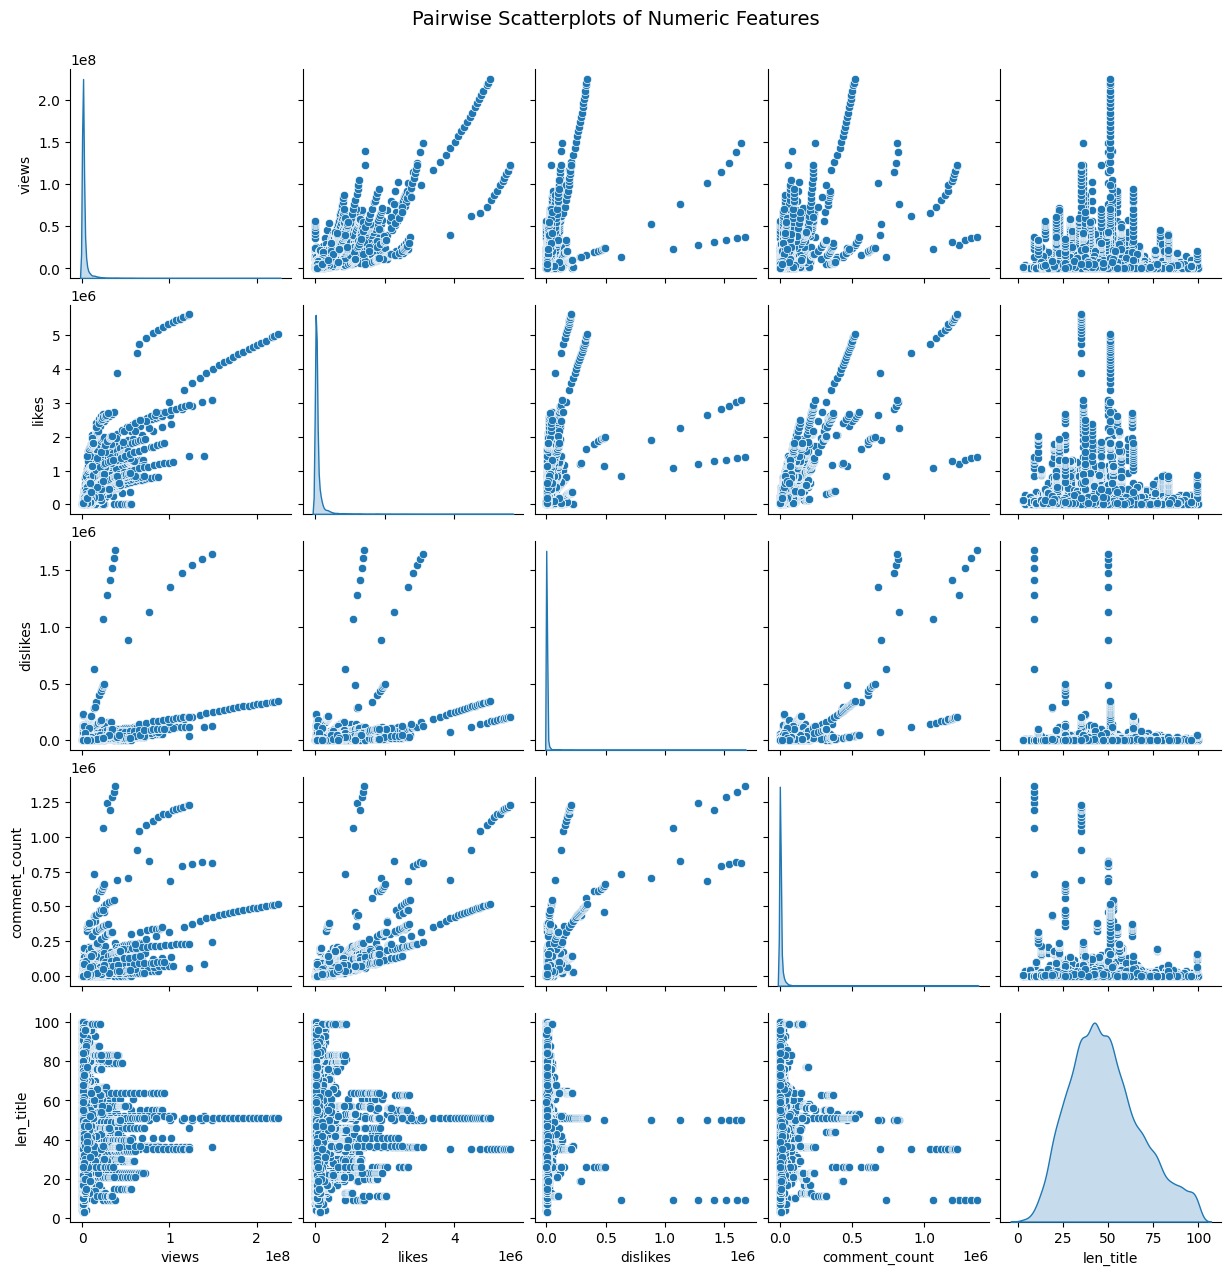

In [64]:
import seaborn as sns

# first we visualize how the data is distributed for all one vs one numerical feature

sns.pairplot(df[['views', 'likes',"dislikes", 'comment_count','len_title']], diag_kind="kde", markers="o", corner=False)

# Show the plot
plt.suptitle("Pairwise Scatterplots of Numeric Features", y=1.02, fontsize=14)
plt.show()

## clustering KMEANS and KNN

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [65]:
features = df[['views', 'likes', 'dislikes', 'comment_count','len_title']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means 
kmeans = KMeans(n_clusters=3, random_state=42)
features['kmeans_cluster'] = kmeans.fit_predict(scaled_features)



/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/2130275007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['kmeans_cluster'] = kmeans.fit_predict(scaled_features)


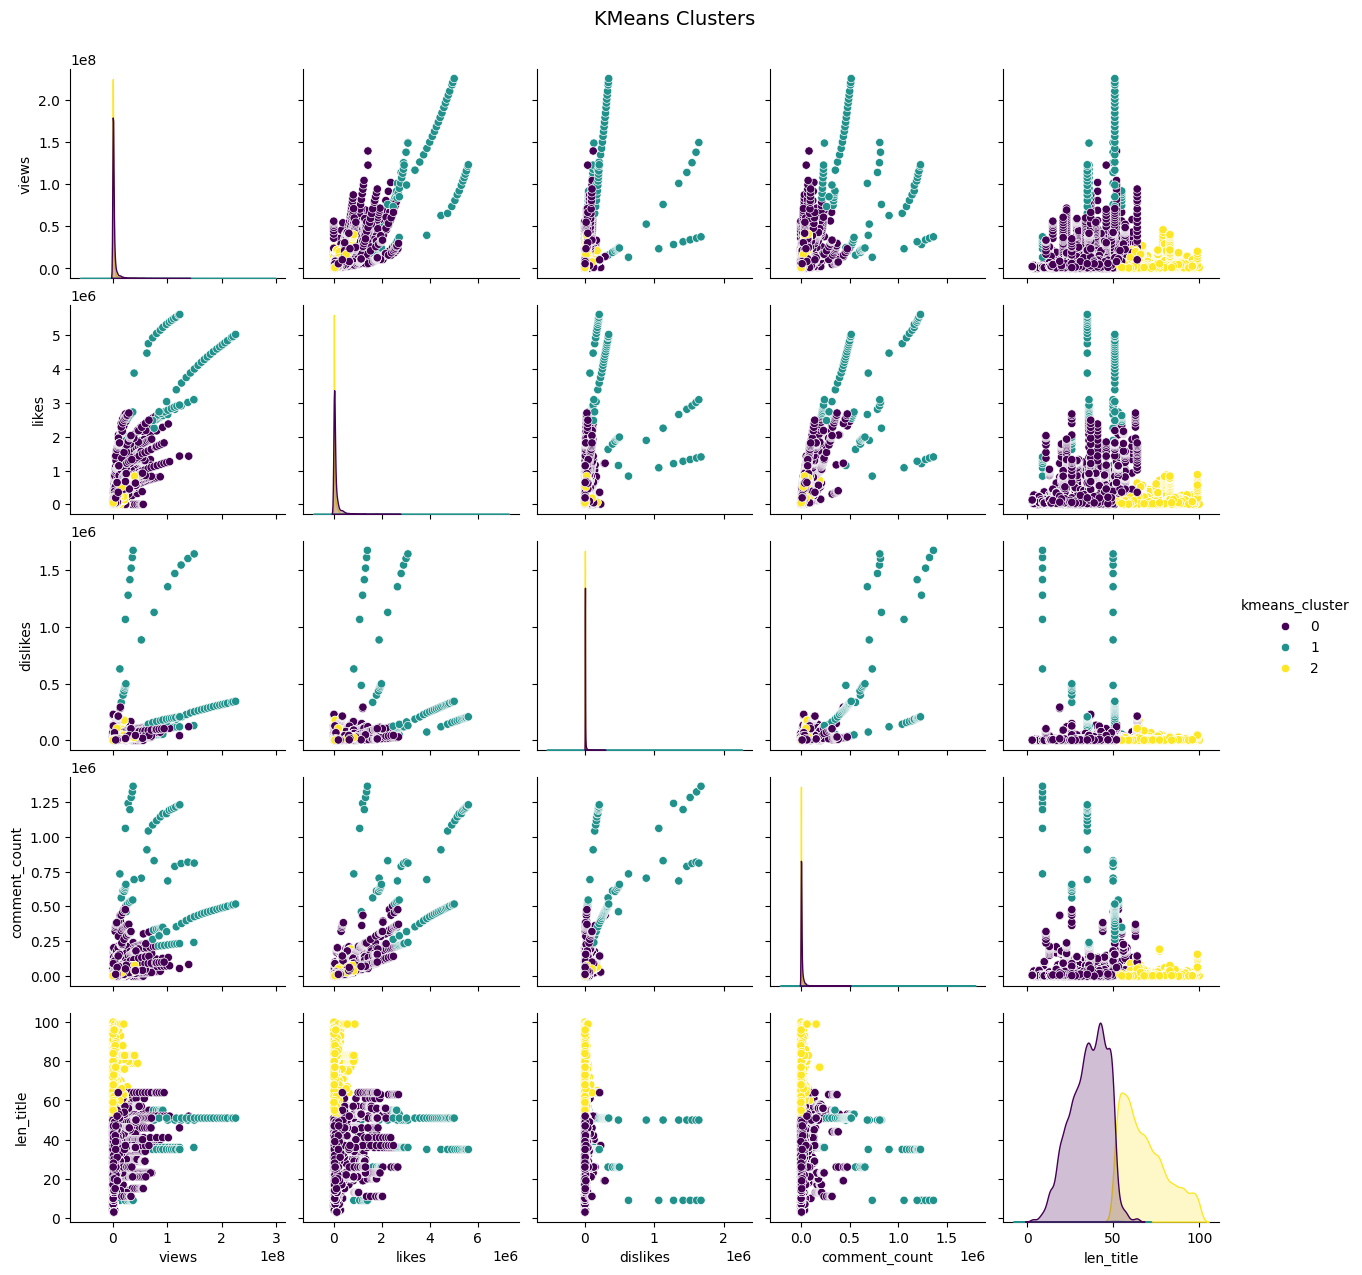

In [66]:
# plots for KMeans clusters
sns.pairplot(features, hue='kmeans_cluster', palette='viridis', markers="o")
plt.suptitle("KMeans Clusters", y=1.02, fontsize=14)
plt.show()


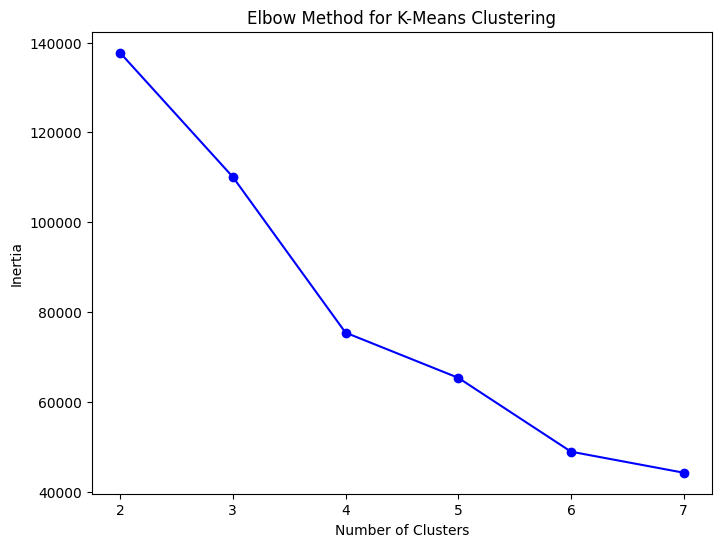

In [67]:
inertia_values = []  # store sum of squared distances from data points to their respective cluster centers  for each K

# testing with 2 to 4 clusters
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 8))
plt.show()

# Classification

#### Feature engineering

In [13]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [14]:
# we have to convert our date variable and split it in 2 variables, day and month (year is not relevant)
df["trending_date"] = pd.to_datetime(df["trending_date"],yearfirst=True,format= "%y.%d.%m")
df["trend_day"] = df["trending_date"].dt.day
df["trend_month"] = df["trending_date"].dt.month

In [46]:
# same for the time it was published
df['publish_time'] = pd.to_datetime(df['publish_time'])

# extract the hour
df['publish_hour'] = df['publish_time'].dt.hour
# extract the minute
df['publish_minute'] = df['publish_time'].dt.minute

# extract lenght of the title
df["len_title"] = df["title"].str.len()


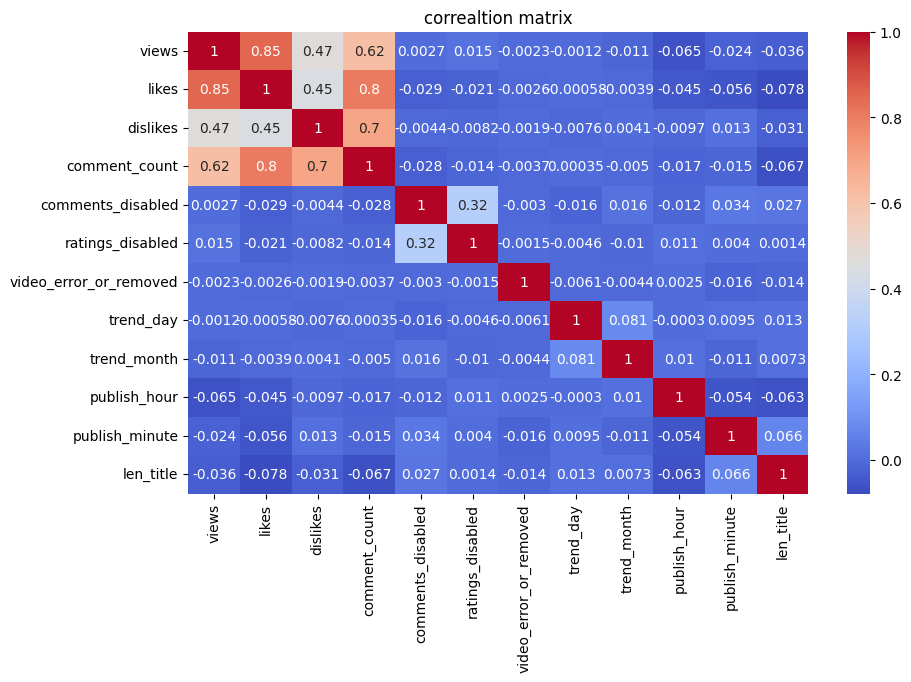

In [47]:
# first it is important to select the correct variables
# since turning categorical variables such as "channel_title" would give us a very extensive list of dummie variables
# it is decided to ommit categorcial variables

corr_features = df[['views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'trend_day', 'trend_month', 'publish_hour','publish_minute',"len_title"]]

plt.figure(figsize=(10, 6))
sns.heatmap(corr_features.corr(), annot=True, cmap='coolwarm')
plt.title('correaltion matrix')
plt.show()

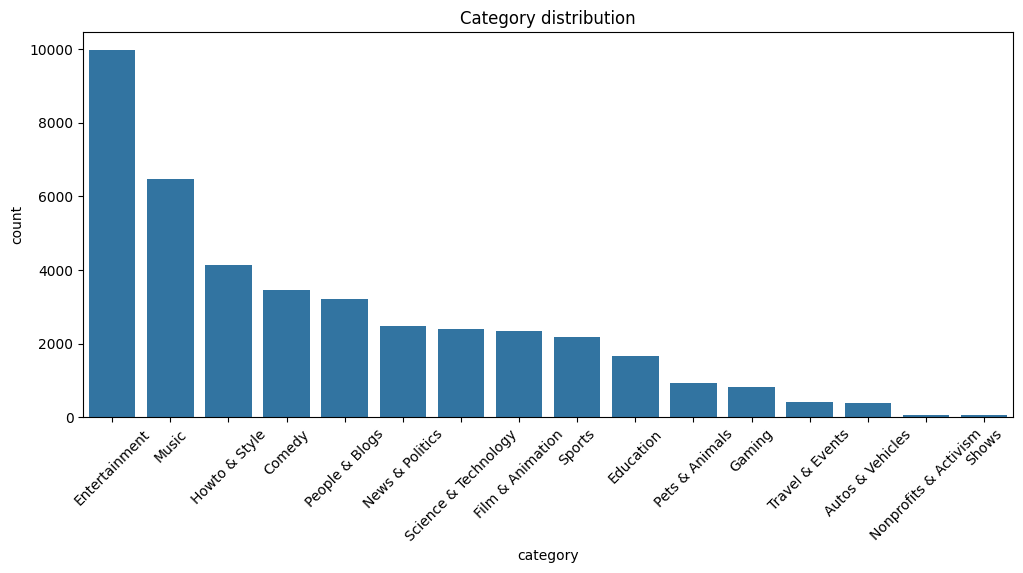

In [19]:
# for a better performance we would need a balanced data
# lets see how the categories are distributed
plt.figure(figsize=(12, 5))  
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Category distribution')
plt.xticks(rotation=45)
plt.show()

/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/2657563186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='views', data=category_views, palette='viridis')


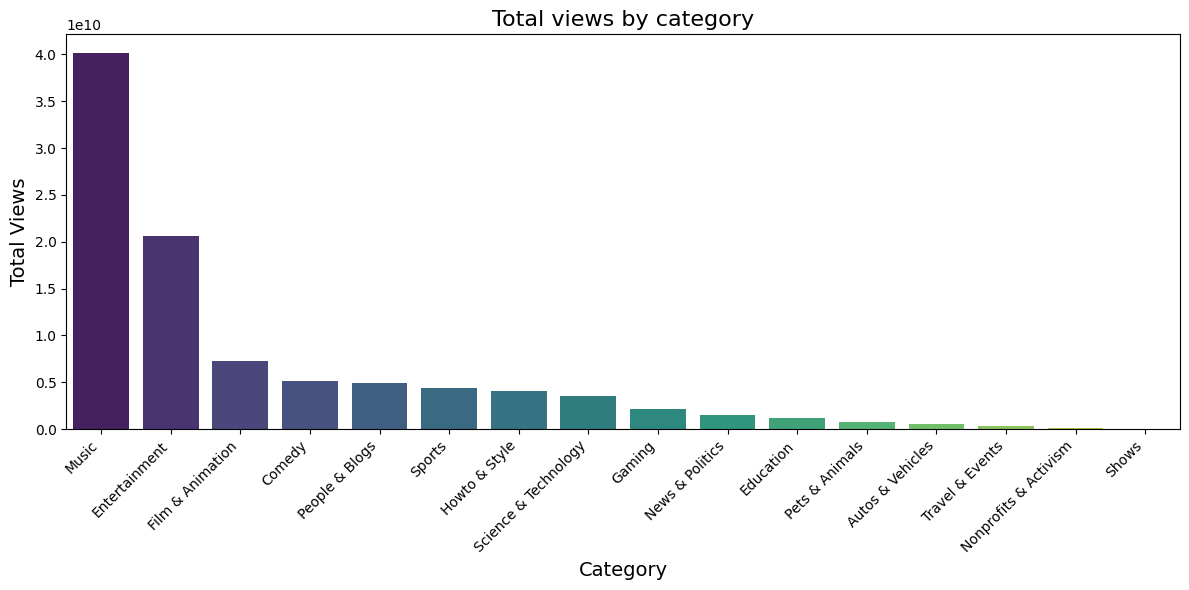

In [20]:
category_views = df.groupby('category')['views'].sum().reset_index()

category_views = category_views.sort_values(by='views', ascending=False)

# Plot a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='views', data=category_views, palette='viridis')
plt.title('Total views by category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Views', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/1502243305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='likes', data=category_views, palette='viridis')


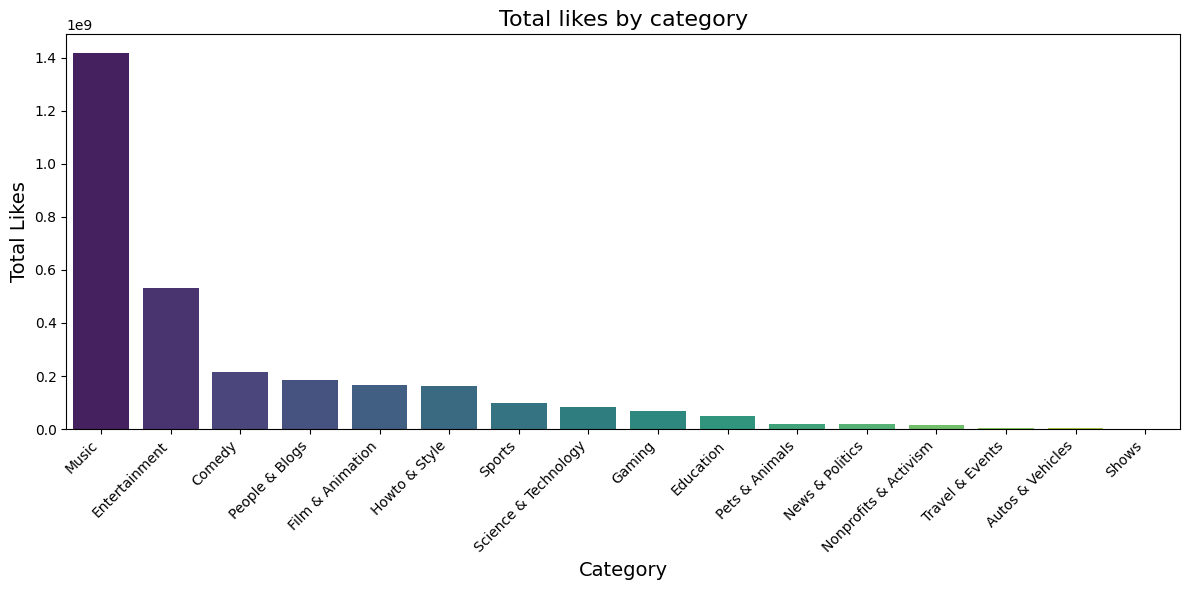

In [22]:
category_views = df.groupby('category')['likes'].sum().reset_index()

category_views = category_views.sort_values(by='likes', ascending=False)

# Plot a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='likes', data=category_views, palette='viridis')
plt.title('Total likes by category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# features for classification
X = corr_features 
y = df['category'] 

# splitting train-test dataset
# using stratify because data is not balanced per category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# fit simple random forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

# model metrics
print(classification_report(y_train, y_pred_train))

                       precision    recall  f1-score   support

     Autos & Vehicles       1.00      1.00      1.00       307
               Comedy       1.00      1.00      1.00      2765
            Education       1.00      1.00      1.00      1325
        Entertainment       1.00      1.00      1.00      7971
     Film & Animation       1.00      1.00      1.00      1876
               Gaming       1.00      1.00      1.00       654
        Howto & Style       1.00      1.00      1.00      3317
                Music       1.00      1.00      1.00      5177
      News & Politics       1.00      1.00      1.00      1989
Nonprofits & Activism       1.00      1.00      1.00        46
       People & Blogs       1.00      1.00      1.00      2568
       Pets & Animals       1.00      1.00      1.00       736
 Science & Technology       1.00      1.00      1.00      1921
                Shows       1.00      1.00      1.00        46
               Sports       1.00      1.00      1.00  

In [62]:
# testing metrics
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

     Autos & Vehicles       0.96      0.84      0.90        77
               Comedy       0.97      0.91      0.94       692
            Education       0.96      0.96      0.96       331
        Entertainment       0.90      0.97      0.93      1993
     Film & Animation       0.99      0.91      0.95       469
               Gaming       1.00      0.87      0.93       163
        Howto & Style       0.94      0.95      0.95       829
                Music       0.95      0.97      0.96      1295
      News & Politics       0.93      0.94      0.93       498
Nonprofits & Activism       1.00      1.00      1.00        11
       People & Blogs       0.96      0.92      0.94       642
       Pets & Animals       0.95      0.90      0.93       184
 Science & Technology       0.98      0.91      0.95       480
                Shows       1.00      0.82      0.90        11
               Sports       0.96      0.93      0.94  

/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/4203447875.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


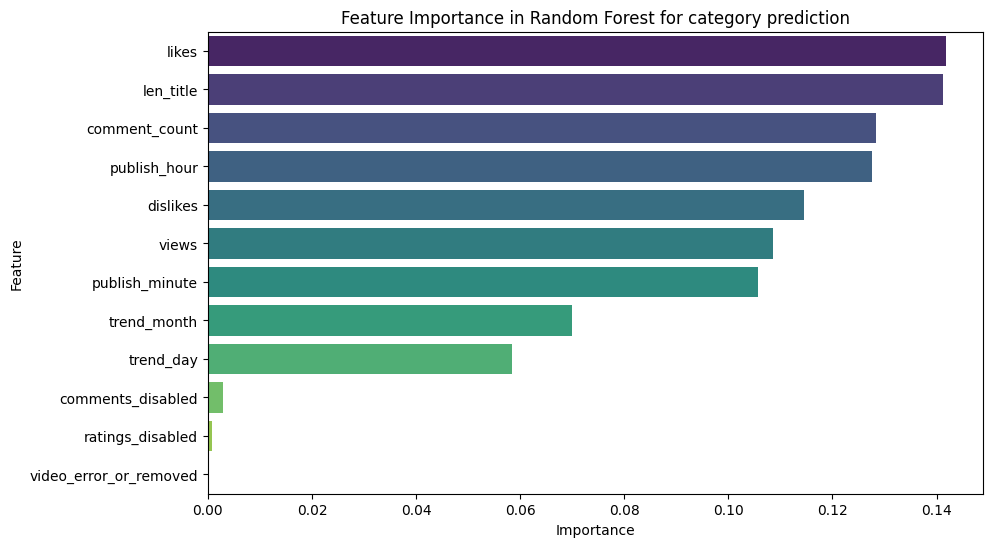

In [63]:
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 7: Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest for category prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicting views or likes

## Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# for  predicting views or likes we would need to remove all variables post-publication
X = df[['comments_disabled', 'ratings_disabled', 'publish_hour','publish_minute','category',"len_title"]]  #(exclude 'views' or 'likes)

dummies = pd.get_dummies(X['category'], prefix='Category')

features = X.drop(columns=['category'])

for c in dummies.columns.values:
    features[c] = dummies[c]

features = features.fillna(features.mean())

y = df['likes']  # target variable (views or likes)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_regressor = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42).fit(X_train_scaled, y_train)



In [55]:
y_pred_reg = clf_regressor.predict(X_test_scaled)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_reg))
mape = np.mean(np.abs((y_test- y_pred_reg) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print(clf_regressor.score(X_test_scaled,y_test))


Mean Squared Error (MSE): 23446651634.536476
Mean Absolute Percentage Error (MAPE): inf
Accuracy: -inf
0.4685588998956147


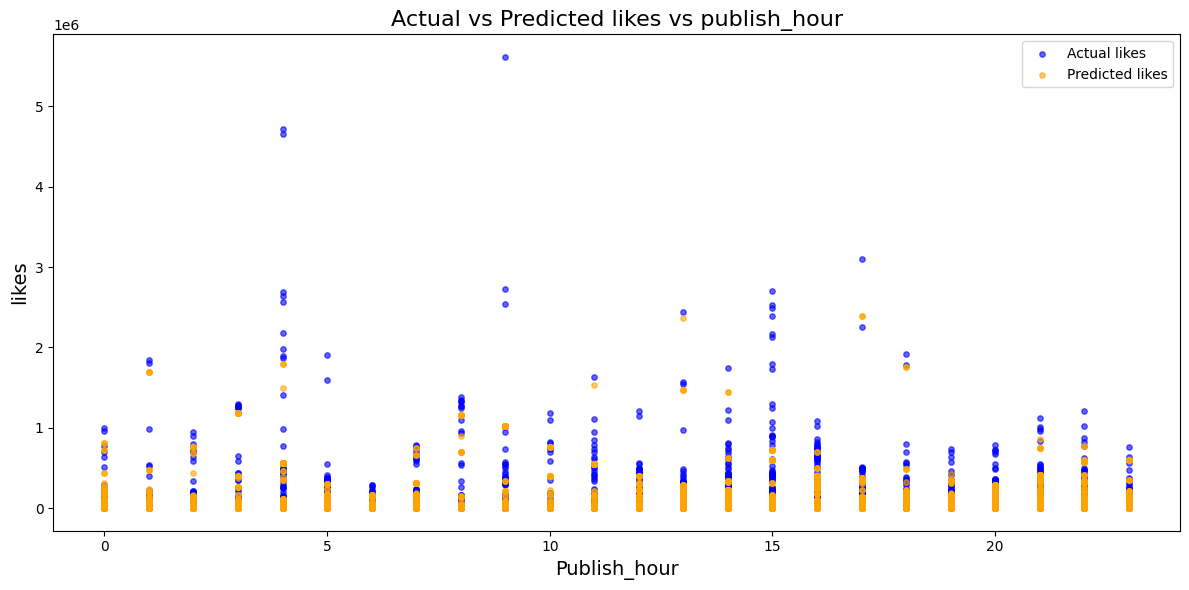

In [57]:
feature_name = 'publish_hour'
x_feature = X_test[feature_name]

# Predict the views using the trained Random Forest Regressor
y_pred = clf_regressor.predict(X_test_scaled)

# Plot actual vs predicted views against the selected feature
plt.figure(figsize=(12, 6))
plt.scatter(x_feature, y_test, label='Actual likes', alpha=0.6, color='blue', s=15)
plt.scatter(x_feature, y_pred, label='Predicted likes', alpha=0.6, color='orange', s=15)
plt.title(f'Actual vs Predicted likes vs {feature_name}', fontsize=16)
plt.xlabel(feature_name.capitalize(), fontsize=14)
plt.ylabel('likes', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Gradient Boosting Regr.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

# Predict the views on the test set
y_pred_gb = gb_regressor.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(gb_regressor.score(X_test_scaled,y_test))


Mean Squared Error (MSE): 36931954947.71
0.16290142096433669


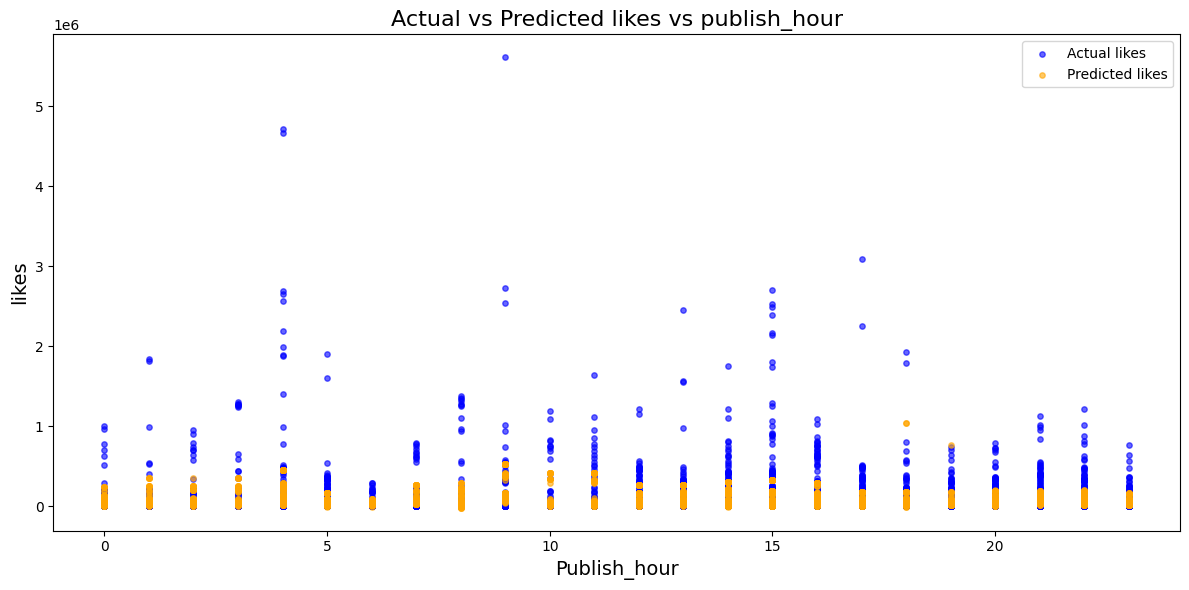

In [52]:
feature_name = 'publish_hour'
x_feature = X_test[feature_name]

# Predict the views using the trained Random Forest Regressor
y_pred = gb_regressor.predict(X_test_scaled)

# Plot actual vs predicted views against the selected feature
plt.figure(figsize=(12, 6))
plt.scatter(x_feature, y_test, label='Actual likes', alpha=0.6, color='blue', s=15)
plt.scatter(x_feature, y_pred, label='Predicted likes', alpha=0.6, color='orange', s=15)
plt.title(f'Actual vs Predicted likes vs {feature_name}', fontsize=16)
plt.xlabel(feature_name.capitalize(), fontsize=14)
plt.ylabel('likes', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Time series analysis

In [72]:
df.video_id.unique()

array(['2kyS6SvSYSE', '1ZAPwfrtAFY', '5qpjK5DgCt4', ..., '6h8QgZF5Qu4',
       'mpnshdmtE2Y', 'yz7Xq3T0YPs'], dtype=object)

### visualizing how the views grow over the trending date

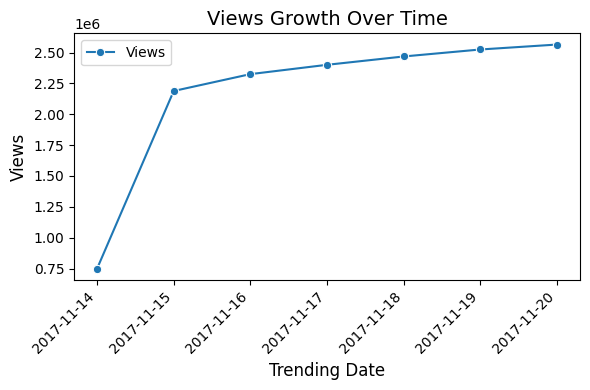

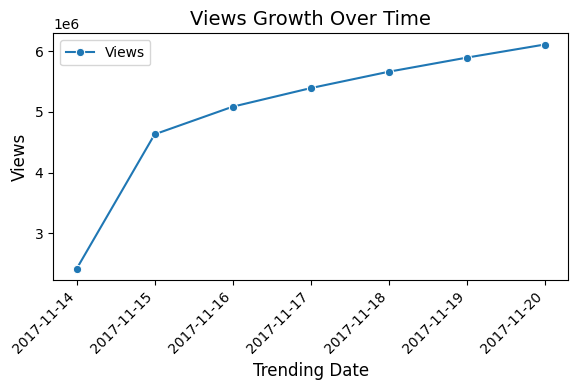

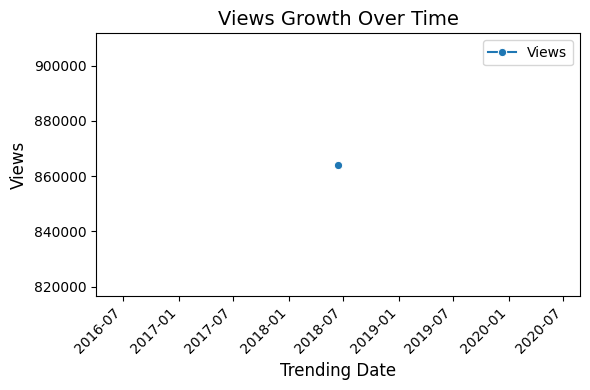

In [83]:
video_id = '2kyS6SvSYSE'
video_data = df[df['video_id'] == video_id].sort_values(by='trending_date')

plt.figure(figsize=(6, 4))
sns.lineplot(data=video_data, x='trending_date', y='views', marker='o', label='Views')
plt.title('Views Growth Over Time', fontsize=14)
plt.xlabel('Trending Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

video_id = '1ZAPwfrtAFY'
video_data = df[df['video_id'] == video_id].sort_values(by='trending_date')

plt.figure(figsize=(6, 4))
sns.lineplot(data=video_data, x='trending_date', y='views', marker='o', label='Views')
plt.title('Views Growth Over Time', fontsize=14)
plt.xlabel('Trending Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

video_id = '6h8QgZF5Qu4'
video_data = df[df['video_id'] == video_id].sort_values(by='trending_date')

plt.figure(figsize=(6, 4))
sns.lineplot(data=video_data, x='trending_date', y='views', marker='o', label='Views')
plt.title('Views Growth Over Time', fontsize=14)
plt.xlabel('Trending Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

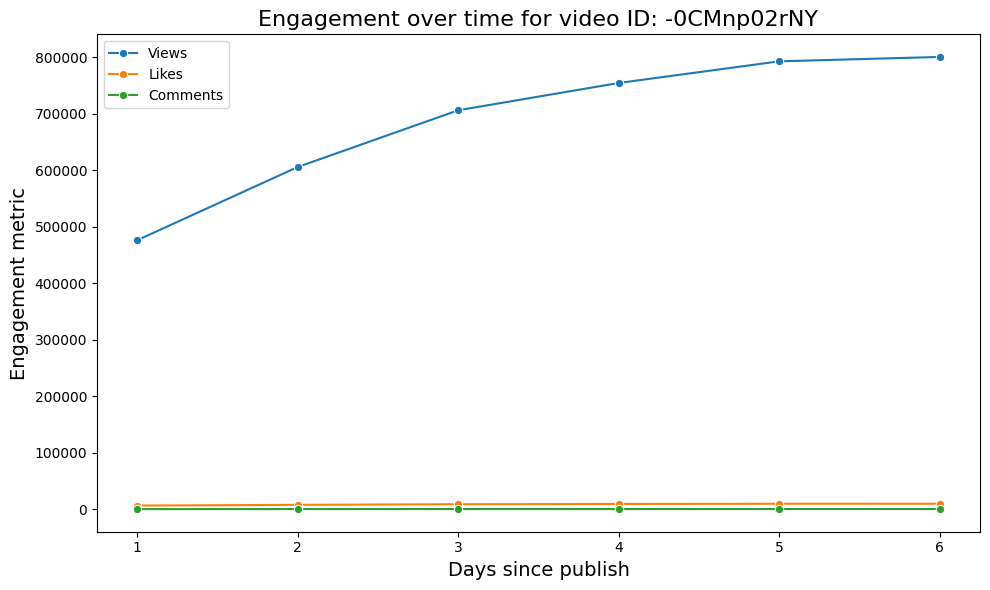

In [129]:
# calculate the days since publishing for trending_date

df["publish_date"] = pd.to_datetime(df["publish_time"],errors="coerce")
df['publish_date'] = df['publish_date'].dt.tz_localize(None) # presented erros with the datatype because publish date includes time 
df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")
df['days_since_publish'] = (df['trending_date'] - df['publish_date']).dt.days

# Group by video_id to calculate mean engagement metrics per day
time_series_df = df.groupby(['video_id', 'days_since_publish'], as_index=False).agg({
    'views': 'mean',
    'likes': 'mean',
    'comment_count': 'mean'
})

# visualize views growth over time for a single video
video_id = time_series_df['video_id'].iloc[0]  # first video for simplicity
single_video_data = time_series_df[time_series_df['video_id'] == video_id]

plt.figure(figsize=(10, 6))
sns.lineplot(data=single_video_data, x='days_since_publish', y='views', marker='o', label='Views')
sns.lineplot(data=single_video_data, x='days_since_publish', y='likes', marker='o', label='Likes')
sns.lineplot(data=single_video_data, x='days_since_publish', y='comment_count', marker='o', label='Comments')
plt.title(f'Engagement over time for video ID: {video_id}', fontsize=16)
plt.xlabel('Days since publish', fontsize=14)
plt.ylabel('Engagement metric', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


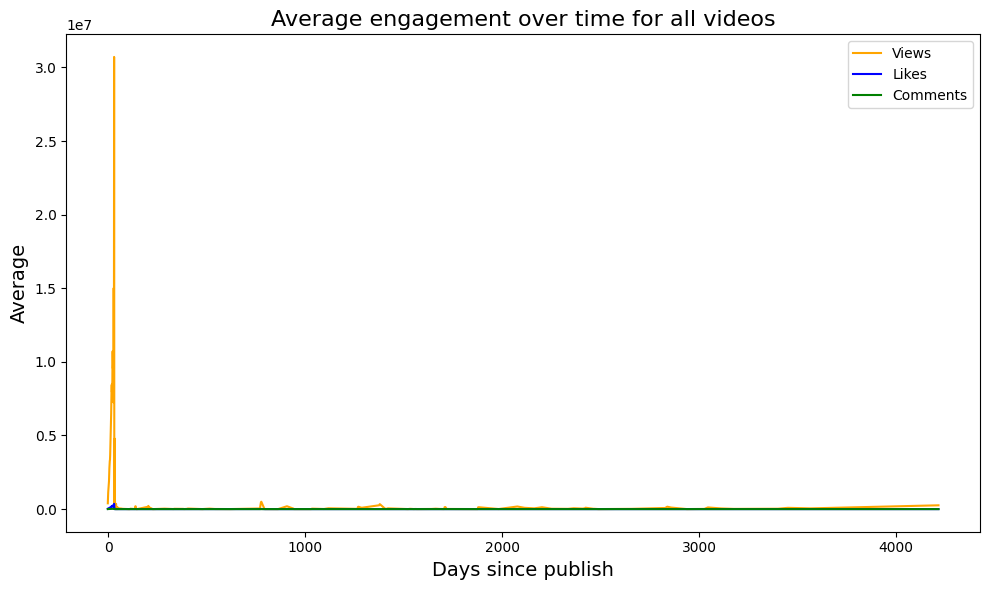

In [131]:

# visualize aggregated views, likes, and comments over all videos
agg_data = time_series_df.groupby('days_since_publish', as_index=False).agg({
    'views': 'mean',
    'likes': 'mean',
    'comment_count': 'mean'
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_data, x='days_since_publish', y='views', label='Views', color='orange')
sns.lineplot(data=agg_data, x='days_since_publish', y='likes', label='Likes', color='blue')
sns.lineplot(data=agg_data, x='days_since_publish', y='comment_count', label='Comments', color='green')
plt.title('Average engagement over time for all videos', fontsize=16)
plt.xlabel('Days since publish', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Sentiment analysis Description

In [135]:
! pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [146]:
from textblob import TextBlob

# just in case column has missing values
df['description'] = df['description'].fillna('')

# textblob sentiment analysis
df['sentiment_polarity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# classify sentiment as positive, negative, or neutral based on polarity
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(classify_sentiment)

df[['description', 'sentiment_polarity', 'sentiment_category']].head()

,description,sentiment_polarity,sentiment_category
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.166667,Negative
1,"One year after the presidential election, John...",0.079167,Neutral
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.145833,Positive
3,Today we find out if Link is a Nickelback amat...,-0.017330,Neutral
4,I know it's been a while since we did this sho...,0.459091,Positive


In [147]:
# Group by sentiment category and calculate average views, likes, etc.
sentiment_analysis = df.groupby('sentiment_category').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

sentiment_analysis

,sentiment_category,views,likes,dislikes,comment_count
0,Negative,2.095888e+06,73389.097170,3132.160705,8475.484784
1,Neutral,2.784369e+06,80009.464936,4951.467161,9335.286691
2,Positive,2.188406e+06,71741.010430,3193.109536,8044.611447


/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/2641195100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='sentiment_category', y='views', palette='coolwarm')


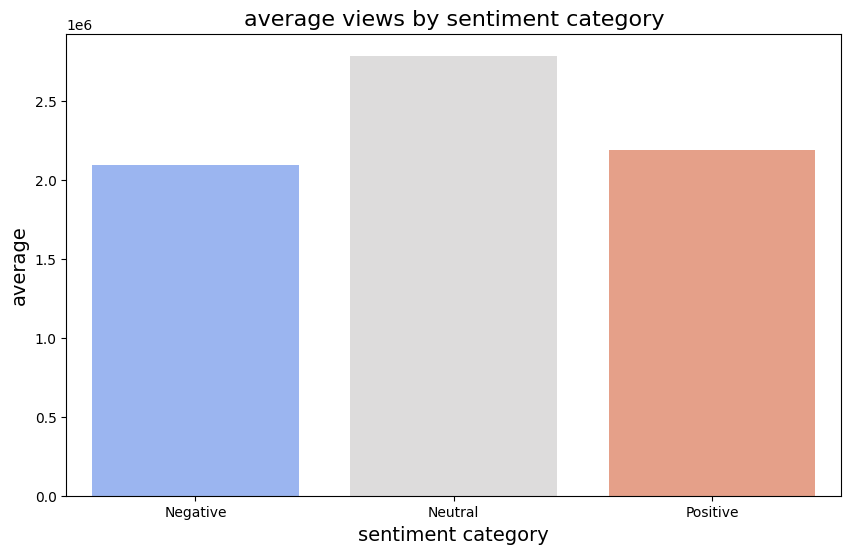

/var/folders/m_/kknjhk_n0hng6y7cbwcnfbqc0000gn/T/ipykernel_70572/2641195100.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='sentiment_category', y='likes', palette='coolwarm')


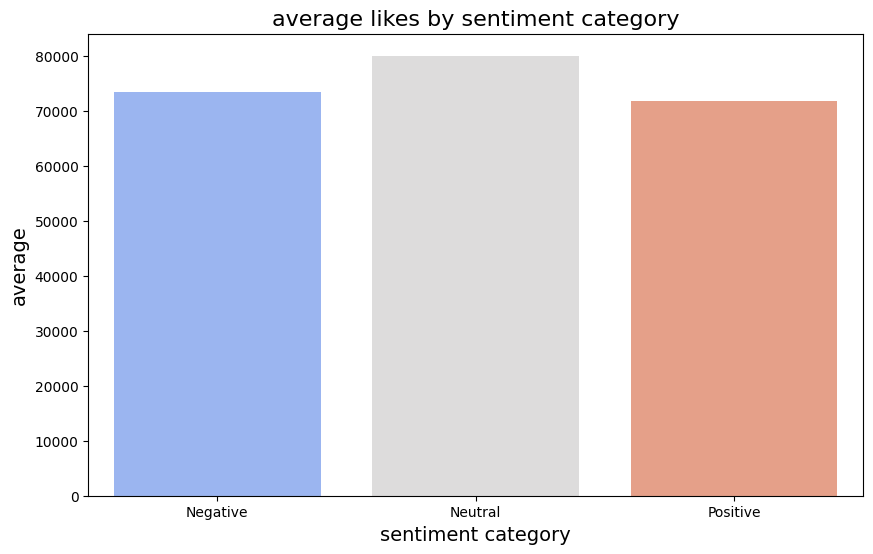

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis, x='sentiment_category', y='views', palette='coolwarm')
plt.title('average views by sentiment category', fontsize=16)
plt.xlabel('sentiment category', fontsize=14)
plt.ylabel('average', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis, x='sentiment_category', y='likes', palette='coolwarm')
plt.title('average likes by sentiment category', fontsize=16)
plt.xlabel('sentiment category', fontsize=14)
plt.ylabel('average', fontsize=14)
plt.show()

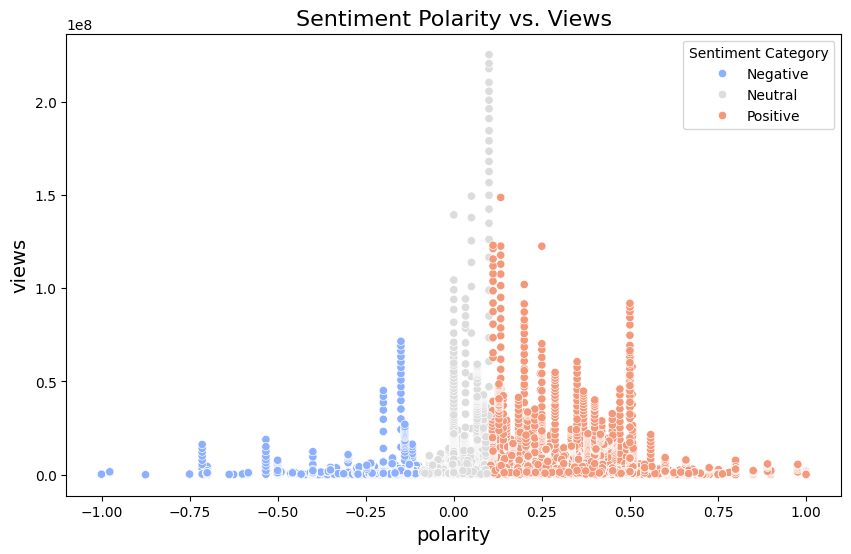

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment_polarity', y='views', hue='sentiment_category', palette='coolwarm')
plt.title('Sentiment Polarity vs. Views', fontsize=16)
plt.xlabel('polarity', fontsize=14)
plt.ylabel('views', fontsize=14)
plt.legend(title='Sentiment Category')
plt.show()